In [1]:
# Imports
%matplotlib inline

import os
import numpy as np
import pandas as pd
import numpy.random as rand
from itertools import islice
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
import math
import sklearn.datasets as datasets
# import sklearn.cross_validation as cv
import sklearn.model_selection as cv
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import log_loss, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.linear_model import LogisticRegression

plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)
# from IPython.display import HTML

In [2]:
def score_matrix(obj):
    name = str(obj.__class__).split(".")[-1][:-2]
    score = obj.score(X_test,y_test)
    y_pred = obj.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    precision = tp / (tp +fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print("Model: {}".format(name))
    print("precision = {:.2%}".format(precision))
    print("recall = {:.2%}".format(recall))
    print('accuracy = {:.2%}, score = {:.2%}'.format(accuracy,score))

# Data Cleaning Pipeline

In [3]:
user_df = pd.read_csv('Data/Donations_File.csv', parse_dates=['Date'])

In [4]:
user_df.drop(columns=['Donation ID','User ID','Givz Everywehre?','To Charity','Advised Charity',
                     'Unnamed: 10','Recurring Status','Advised Charity EIN','To Charity EIN'],inplace=True)

In [5]:
user_df['Event?'] = user_df['Event?'].apply(lambda x: False if math.isnan(x) else True)

In [6]:
# Drop Negative Tip Amounts
user_df = user_df[user_df.Tip >= 0]

In [7]:
#Calculate Proportion of Donations that Include Tip
tip_df = user_df[user_df.Tip > 0]

user_tip_proportion = (tip_df.shape[0])/(user_df.shape[0])

In [8]:
user_df['Tip'] = user_df['Tip'].apply(lambda x: False if x == 0.0 else True)

In [9]:
# Number to Beat!
user_tip_proportion

0.10453648915187377

In [10]:
#user_df['Date'] = pd.to_datetime(user_df['Date'])
user_df['Year'] = user_df['Date'].apply(lambda x: x.year)
user_df['Month'] = user_df['Date'].apply(lambda x: x.month)
user_df['Day'] = user_df['Date'].apply(lambda x: x.day)
user_df['Hour'] = user_df['Date'].apply(lambda x: x.hour)
user_df['Minute'] = user_df['Date'].apply(lambda x: x.minute)


In [11]:
#user_df['Advised Charity EIN'] = user_df['Advised Charity EIN'].apply(lambda x: int(x.replace(',', '')))

In [12]:
user_df['Message to Charity2'] = user_df['Message to Charity2'].apply(lambda x: True if type(x) == str else False)
user_df['Message to Charity1'] = user_df['Message to Charity1'].apply(lambda x: True if type(x) == str else False)
user_df['Message'] = (user_df['Message to Charity2'] == True) | (user_df['Message to Charity1']==True)

In [13]:
user_df.drop(columns=['Date','Message to Charity1','Message to Charity2'],inplace=True)

In [27]:
user_df['Tip'] = user_df['Tip'].map({False:0,True:1})

In [28]:
user_df.head(100)

,Amount,In Honor Of?,Event?,Cover fee?,Tip,Year,Month,Day,Hour,Minute,Message
0,25.00,False,False,False,0,2019,9,11,3,17,False
1,20.00,False,False,False,0,2019,9,10,22,55,False
2,21.00,False,False,False,0,2019,9,10,22,55,False
3,140.00,False,False,False,0,2019,9,10,22,29,False
4,1.00,False,False,False,0,2019,9,10,16,52,False
...,...,...,...,...,...,...,...,...,...,...,...
95,5.00,False,False,False,1,2019,7,22,15,7,False
96,5.00,False,False,False,1,2019,7,22,11,29,False
97,100.00,True,False,False,0,2019,7,21,10,3,False
98,260.32,False,True,False,0,2019,7,19,21,36,False


In [ ]:
user_df.groupby()

In [426]:
# df['month'] = df['start_date'].dt.month
# df['year'] = df['start_date'].dt.year
# df['day_of_week'] = df['start_date'].dt.dayofweek
# df['hour'] = df['start_date'].dt.hour
# df.head()

# Machine Learning Models

In [29]:
y = user_df['Tip']
X = user_df.drop(columns=['Tip'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Random Forest

In [17]:
forest = RandomForestClassifier(oob_score=True,n_estimators=300)
forest.fit(X_train,y_train)
score_matrix(forest)

Model: RandomForestClassifier
precision = 60.00%
recall = 56.90%
accuracy = 92.59%, score = 92.59%


# Logistic Regression

In [439]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
score_matrix(log_reg)

Model: LogisticRegression
precision = 41.18%
recall = 10.61%
accuracy = 89.12%, score = 89.12%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <a list of 10 Text xticklabel objects>)

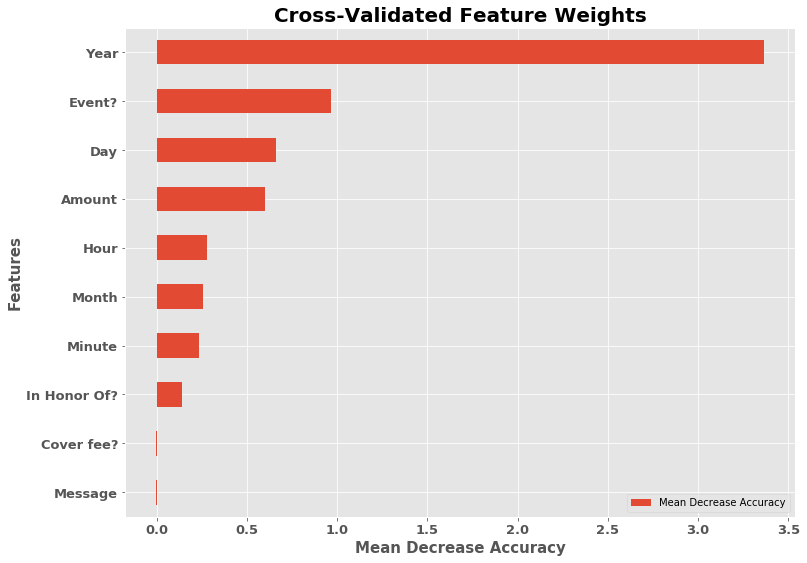

In [30]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

names = X.columns
 
rf = GradientBoostingClassifier(n_estimators=30, learning_rate=.74, max_features=4, max_depth=2, random_state=0)
scores = defaultdict(list)
 
# crossvalidate the scores on a number of 
# different random splits of the data
splitter = ShuffleSplit(100, test_size=.3)

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    rf.fit(X_train, y_train)
    acc = r2_score(y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort_values(by='Mean Decrease Accuracy').plot(kind='barh',figsize=(12,9))
plt.title("Cross-Validated Feature Weights",weight="bold",fontsize=20)
plt.xlabel("Mean Decrease Accuracy",weight="bold",fontsize=15)
plt.ylabel("Features",weight="bold",fontsize=15)
plt.yticks(weight="bold",fontsize=13)
plt.xticks(weight="bold",fontsize=13)